# Behavior of the SIR Model

In this exercise we will explore the behavior and properties of the SIR model. 

In [2]:
# Load libraries
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

In [4]:
# Define a function for numerically integrating the SIR model
def sir_model(state, time, parameters):
    # Unpack Parameters
    S, I, R = state
    beta, gamma = parameters
    
    # Calculate total population size
    N = S + I + R
    
    # Calculate force of infection
    lambd = beta * I / N
    
    # Calculate derivatives
    dS = -lambd * S
    dI = lambd * S - gamma * I
    dR = gamma * I
    
    # Return derivative
    return [dS, dI, dR]

For a range of parameter values of beta and gamma, find the size of the epidemic. (This code block may take a minute to run.)

In [4]:
# Initial state values
initial_state_values = [9999, 1, 0]

# Define a list of time steps
times = np.arange(0, 1000.1, 0.1)

# Create an empty DataFrame to store results
beta_gamma_outbreak = pd.DataFrame(columns=['beta', 'gamma', 'outbreak.size'])

# Loop over a range of beta and gamma
for beta_value in np.arange(0, 1.1, 0.1):
    for gamma_value in np.arange(0.1, 1.1, 0.1):
        parameters = {'beta': beta_value, 'gamma': gamma_value}
        
        # Integrate the SIR model
        sir_output = odeint(sir_model, initial_state_values, times, args=(list(parameters.values()),))
        
        # Find the total outbreak size
        total_recovered = sir_output[sir_output[:, 1] < 1][0, 2]
        
        # Append the results to the DataFrame
        beta_gamma_outbreak = beta_gamma_outbreak.append({'beta': beta_value,
                                                          'gamma': gamma_value,
                                                          'outbreak.size': total_recovered},
                                                         ignore_index=True)

beta_gamma_outbreak = beta_gamma_outbreak.astype({'beta': float, 'gamma': float, 'outbreak.size': int})

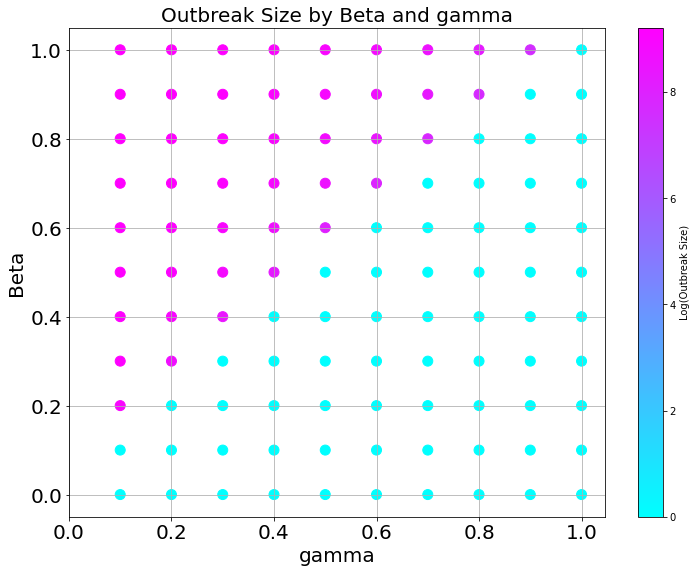

In [5]:
# Plot the data
plt.figure(figsize = (12,9))
plt.scatter(beta_gamma_outbreak['gamma'], beta_gamma_outbreak['beta'], c=np.log(beta_gamma_outbreak['outbreak.size']+1), cmap='cool', s=100)
plt.colorbar().set_label('Log(Outbreak Size)')
plt.xlabel('gamma', fontsize = 20)
plt.ylabel('Beta', fontsize = 20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize = 20)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize = 20)
plt.title('Outbreak Size by Beta and gamma', fontsize = 20)
plt.grid(visible=True)
plt.show()

## Question: What do you notice about how the outbreak size depends on beta and gamma?


# Behavior of the SIR Model Part 2

How does the outbreak size change depending on the basic reproductive number R_0 = beta/gamma?

Fix gamma = .2, vary beta from 0 to 1 such that R_0 varies from 0 to 5.

In [5]:
# Define a list of time steps
times = np.arange(0, 1000, 0.1)

# Initialize the output data frame
r0_outbreak = {'R_0': [], 'outbreak_size': []}

gamma_value = 0.2
for beta_value in np.arange(0, 1, 0.05):
    parameters = {'beta': float(beta_value), 'gamma': float(gamma_value)}

    # Initial state values
    initial_state_values = [999, 1, 0]  # S, I, R

    # Integrate
    sir_output = odeint(sir_model, initial_state_values, times, args=(list(parameters.values()),))

    # Find the total outbreak size
    total_recovered = sir_output[sir_output[:, 1] < 1][0, 2]

    # Add data to the output data frame
    r0_outbreak['R_0'].append(beta_value / gamma_value)
    r0_outbreak['outbreak_size'].append(total_recovered)

# Convert output data to a pandas DataFrame
r0_outbreak = pd.DataFrame(r0_outbreak)

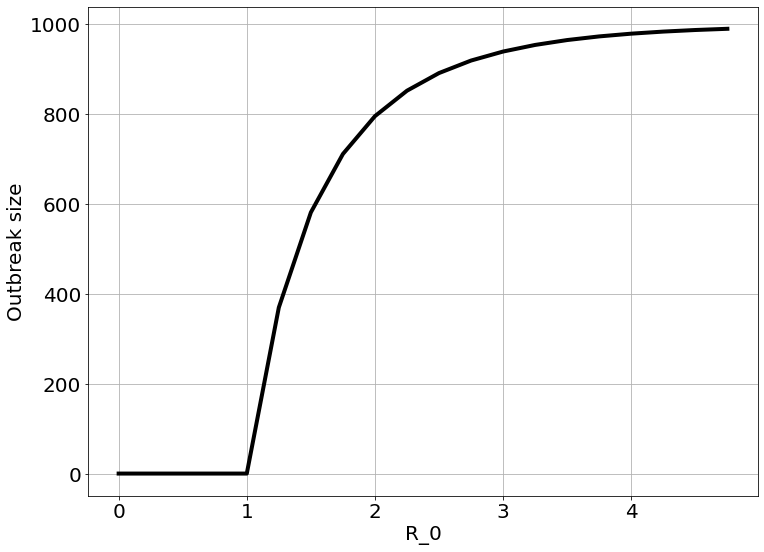

In [6]:
# Plot the data
plt.figure(figsize = (12,9))
plt.plot(r0_outbreak['R_0'], r0_outbreak['outbreak_size'], linewidth=4, color = 'k')
plt.xlabel("R_0", fontsize = 20)
plt.ylabel("Outbreak size", fontsize =20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid(True)
plt.show()

## Question: How does the outbreak size depend on R_0?
What do you notice about how the model behaves as a function of R_0? Does this result change if we pick a different fixed value for gamma?

# Optional exercise: When does the epidemic die out?

Let R_effective = R_0 * S/N. This can be interpreted as the number of secondary cases arising from a single infection in a population which has already been partially infected.

Plot R-effective and the number of infected individuals together


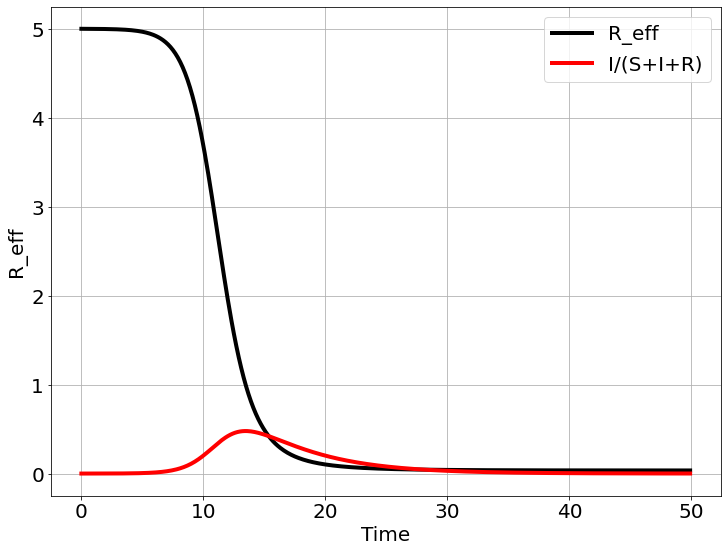

In [7]:
# Initial state values
initial_state_values = [9999, 1, 0]

# Parameter values
parameters = {'beta': 1, 'gamma': 0.2}

# Time
times = np.arange(0, 50, 0.1)

# Integrate
sir_output = odeint(sir_model, initial_state_values, times, args=(list(parameters.values()),))

# Convert output to a pandas DataFrame
sir_output = pd.DataFrame(sir_output, columns=['S', 'I', 'R'])
sir_output['time'] = times

# Plotting
plt.figure(figsize = (12,9))
plt.plot(sir_output['time'], parameters['beta'] / parameters['gamma'] * sir_output['S'] / (sir_output['S'] + sir_output['I'] + sir_output['R']),
         linewidth=4, color='black', label='R_eff')
plt.plot(sir_output['time'], sir_output['I'] / (sir_output['S'] + sir_output['I'] + sir_output['R']),
         linewidth=4, color='red', label='I/(S+I+R)')
plt.xlabel("Time", fontsize = 20)
plt.ylabel("R_eff", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.grid(True)
plt.show()

## Question: At what time does the epidemic peak occur?


In [8]:
max_i_rows = sir_output[sir_output['I'] == max(sir_output['I'])]
max_i_time = max_i_rows.iloc[0]['time']
max_i_time

13.5

## Question: At the time of the epidemic peak, what is the value of R_eff?

In [9]:
beta_value = 1
gamma_value = .2
result = beta_value / gamma_value * max_i_rows['S'] / (max_i_rows['S'] + max_i_rows['I'] + max_i_rows['R'])
result

135    0.98188
dtype: float64

## Question: What causes an epidemic to die out?

Given the value of R_eff at the peak of the epidemic, what does that tell us about what causes the number of infected individuals to start decreasing as the epidemic dies out?